<a href="https://colab.research.google.com/github/beba0/Projects-/blob/main/supermaket_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from google.colab import files

In [5]:

supermarket = pd.read_csv("/content/supermarket - supermarket.csv")
supermarket.index

RangeIndex(start=0, stop=1000, step=1)

In [6]:
supermarket.head(7)

,index,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36,Ewallet,413.04,4.761905,20.6520,5.8


In [7]:
supermarket['Branch'].unique()


array(['A', 'C', 'B'], dtype=object)

In [8]:
supermarket['Tax 5%'].round(1)

0      26.1
1       3.8
2      16.2
3      23.3
4      30.2
       ... 
995     2.0
996    48.7
997     1.6
998     3.3
999    30.9
Name: Tax 5%, Length: 1000, dtype: float64

supermarket['Total'].round(1)

In [9]:
supermarket['gross margin percentage'].round(1)

0      4.8
1      4.8
2      4.8
3      4.8
4      4.8
      ... 
995    4.8
996    4.8
997    4.8
998    4.8
999    4.8
Name: gross margin percentage, Length: 1000, dtype: float64

In [10]:
supermarket['gross income'].round(1)

0      26.1
1       3.8
2      16.2
3      23.3
4      30.2
       ... 
995     2.0
996    48.7
997     1.6
998     3.3
999    30.9
Name: gross income, Length: 1000, dtype: float64

In [11]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    1000 non-null   int64  
 1   Invoice ID               1000 non-null   object 
 2   Branch                   1000 non-null   object 
 3   City                     1000 non-null   object 
 4   Customer type            1000 non-null   object 
 5   Gender                   1000 non-null   object 
 6   Product line             1000 non-null   object 
 7   Unit price               1000 non-null   float64
 8   Quantity                 1000 non-null   int64  
 9   Tax 5%                   1000 non-null   float64
 10  Total                    1000 non-null   float64
 11  Date                     1000 non-null   object 
 12  Time                     1000 non-null   object 
 13  Payment                  1000 non-null   object 
 14  cogs                     

In [12]:
supermarket.head(5).T

,0,1,2,3,4
index,0,1,2,3,4
Invoice ID,750-67-8428,226-31-3081,631-41-3108,123-19-1176,373-73-7910
Branch,A,C,A,A,A
City,Yangon,Naypyitaw,Yangon,Yangon,Yangon
Customer type,Member,Normal,Normal,Member,Normal
Gender,Female,Female,Male,Male,Male
Product line,Health and beauty,Electronic accessories,Home and lifestyle,Health and beauty,Sports and travel
Unit price,74.69,15.28,46.33,58.22,86.31
Quantity,7,5,7,8,7
Tax 5%,26.1415,3.82,16.2155,23.288,30.2085


In [13]:
supermarket.shape

(1000, 18)

In [14]:
supermarket.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [15]:
supermarket.isnull().all()

index                      False
Invoice ID                 False
Branch                     False
City                       False
Customer type              False
Gender                     False
Product line               False
Unit price                 False
Quantity                   False
Tax 5%                     False
Total                      False
Date                       False
Time                       False
Payment                    False
cogs                       False
gross margin percentage    False
gross income               False
Rating                     False
dtype: bool

In [16]:
supermarket['City'].str.title().value_counts(dropna=False)
supermarket['Customer type'].str.title().value_counts(dropna=False)
supermarket['Gender'].str.title().value_counts(dropna=False)
supermarket['Product line'].str.title().value_counts(dropna=False)
supermarket['Payment'].str.title().value_counts(dropna=False)


Ewallet        345
Cash           344
Credit Card    311
Name: Payment, dtype: int64

#Exploring 


In [17]:
supermarket.sample(5)

,index,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
228,228,466-61-5506,B,Mandalay,Member,Female,Electronic accessories,90.70,6,27.2100,571.4100,2019-02-26,10:52,Cash,544.20,4.761905,27.2100,5.3
672,672,576-31-4774,B,Mandalay,Normal,Female,Health and beauty,73.41,3,11.0115,231.2415,2019-03-02,13:10,Ewallet,220.23,4.761905,11.0115,4.0
633,633,420-04-7590,B,Mandalay,Normal,Male,Home and lifestyle,99.70,3,14.9550,314.0550,2019-03-18,11:29,Ewallet,299.10,4.761905,14.9550,4.7
349,349,400-45-1220,B,Mandalay,Normal,Female,Health and beauty,13.50,10,6.7500,141.7500,2019-02-27,11:06,Credit card,135.00,4.761905,6.7500,4.8
278,278,537-72-0426,C,Naypyitaw,Member,Male,Fashion accessories,70.99,10,35.4950,745.3950,2019-03-20,16:28,Cash,709.90,4.761905,35.4950,5.7


In [18]:
#Analysing Branch 'A'
branch_A = supermarket[supermarket['Branch']=='A']
branch_A.head(5)

,index,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2,2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
6,6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36,Ewallet,413.04,4.761905,20.6520,5.8


In [19]:
branch_A['gross income'].sum()

5057.1605

In [20]:
branch_A['Date'] = pd.to_datetime(branch_A['Date'], errors='coerce')
a = (branch_A.groupby(['Product line', pd.Grouper(freq='M', key='Date', closed='left')])
             ['gross income']
             .sum().round(0)
             .unstack(fill_value=0))
a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Date,2019-01-31,2019-02-28,2019-03-31
Product line,,,
Electronic accessories,297.0,255.0,320.0
Fashion accessories,306.0,267.0,205.0
Food and beverages,221.0,312.0,284.0
Health and beauty,189.0,130.0,281.0
Home and lifestyle,491.0,227.0,349.0
Sports and travel,310.0,226.0,387.0


Text(0, 0.5, 'income')

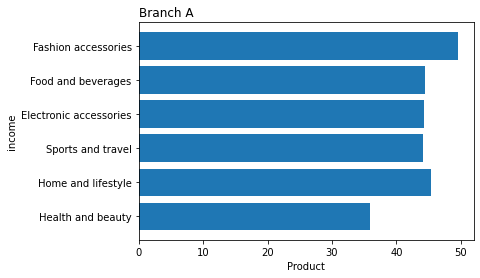

In [59]:
ax = plt.barh(branch_A['Product line'],branch_A['gross income'])
plt.title("Branch A ", loc = 'left')
plt.xlabel('Product')
plt.ylabel('income')

In [22]:
#Analysis Branch 'B'
branch_B = supermarket[supermarket['Branch']=='B']
branch_B.head()

,index,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
9,9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.226,172.746,2019-02-20,13:27,Credit card,164.52,4.761905,8.226,5.9
10,10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.896,60.816,2019-02-06,18:07,Ewallet,57.92,4.761905,2.896,4.5
11,11,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.102,107.142,2019-03-09,17:03,Cash,102.04,4.761905,5.102,6.8
15,15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.116,590.436,2019-01-15,16:19,Cash,562.32,4.761905,28.116,4.5
19,19,319-50-3348,B,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.030,84.630,2019-03-11,15:30,Ewallet,80.60,4.761905,4.030,4.4


In [62]:
branch_B['Date'] = pd.to_datetime(branch_A['Date'], errors='coerce')
b = (branch_A.groupby(['Product line', pd.Grouper(freq='M', key='Date', closed='left')])
             ['gross income']
             .sum().round(0)
             .unstack(fill_value=0))
b

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Date,2019-01-31,2019-02-28,2019-03-31
Product line,,,
Electronic accessories,297.0,255.0,320.0
Fashion accessories,306.0,267.0,205.0
Food and beverages,221.0,312.0,284.0
Health and beauty,189.0,130.0,281.0
Home and lifestyle,491.0,227.0,349.0
Sports and travel,310.0,226.0,387.0


Text(0, 0.5, 'income')

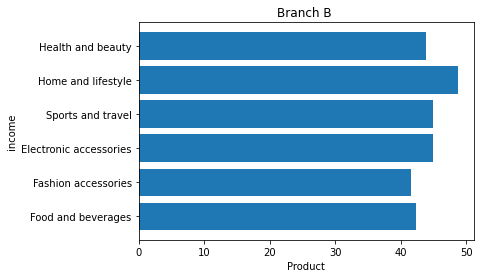

In [61]:
plt.barh(branch_B['Product line'],branch_B['gross income'])
plt.title("Branch B ")
plt.xlabel('Product')
plt.ylabel('income')
  

In [25]:
#Analysis Branch 'C'
branch_C = supermarket[supermarket['Branch']=='C']
branch_C.head()

,index,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
1,1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
5,5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18:30,Ewallet,597.73,4.761905,29.8865,4.1
7,7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2019-02-24,11:38,Ewallet,735.60,4.761905,36.7800,8.0
20,20,300-71-4605,C,Naypyitaw,Member,Male,Electronic accessories,86.04,5,21.5100,451.7100,2019-02-25,11:24,Ewallet,430.20,4.761905,21.5100,4.8
34,34,183-56-6882,C,Naypyitaw,Member,Female,Food and beverages,99.42,4,19.8840,417.5640,2019-02-06,10:42,Ewallet,397.68,4.761905,19.8840,7.5


In [26]:
branch_C['Date'] = pd.to_datetime(branch_A['Date'], errors='coerce')
c = (branch_A.groupby(['Product line', pd.Grouper(freq='M', key='Date', closed='left')])
             ['gross income']
             .sum().round(0)
             .unstack(fill_value=0))
c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Date,2019-01-31,2019-02-28,2019-03-31
Product line,,,
Electronic accessories,297.0,255.0,320.0
Fashion accessories,306.0,267.0,205.0
Food and beverages,221.0,312.0,284.0
Health and beauty,189.0,130.0,281.0
Home and lifestyle,491.0,227.0,349.0
Sports and travel,310.0,226.0,387.0


Text(0, 0.5, 'income')

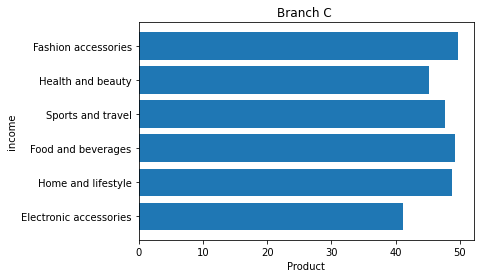

In [63]:
plt.barh(branch_C['Product line'],branch_C['gross income'])
plt.title("Branch C ")
plt.xlabel('Product')
plt.ylabel('income')
  

In [64]:
supermarket['Date'] = pd.to_datetime(supermarket['Date'], errors='coerce')
s = (supermarket.groupby(['Branch', pd.Grouper(freq='Y', key='Date', closed='left')])
             ['gross income']
             .sum()
             .unstack(fill_value=0))
s

Date,2019-12-31
Branch,
A,5057.1605
B,5057.0320
C,5265.1765


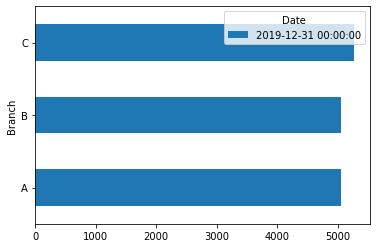

In [66]:
s.plot(kind='barh')

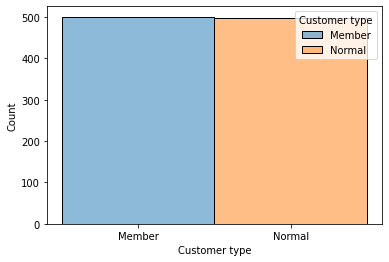

In [30]:
sns.histplot(x='Customer type', data=supermarket, kde=True, hue='Customer type')


In [33]:
#supermarket.to_csv('supermarket.csv',encoding = 'utf-8-sig')
#files.download('supermarket.csv')